Approach
1. Load the data and the libraries
2. Visualize the data
3. Initialize and Sequential Model
4. Set up the layers (Dense, Dropout, Conv2d, Pooling)
5. Compile the model
6. Fitting the model
7. Evaluate the model

Unzip the file

In [ ]:
!unzip '/content/archive (19).zip'

Archive:  /content/archive (19).zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

Load the data

In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the data

In [ ]:
len(train)

60000

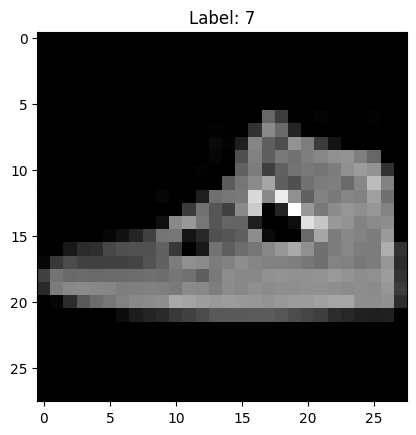

In [ ]:
# Select a random image from the training dataset
image_index = np.random.randint(0, len(train))
image = train.iloc[image_index, 1:].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train.iloc[image_index, 0]}")
plt.show()

Image and Labels

In [ ]:
x = train.drop('label', axis=1)
y = train['label']

Split the data into train, test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Initialize the model and sequential layers

In [ ]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784,)))#layer 1
model.add(Dense(64, activation = 'relu')) #Layer 2
model.add(Dense(64, activation = 'relu')) #Layer 3
model.add(Dense(10, activation = 'softmax')) #Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Y to be encoded

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [ ]:
hist = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test), batch_size=16)

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6524 - loss: 3.2197 - val_accuracy: 0.7667 - val_loss: 0.6630
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7528 - loss: 0.7045 - val_accuracy: 0.7948 - val_loss: 0.5775
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7994 - loss: 0.5625 - val_accuracy: 0.8338 - val_loss: 0.4728
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8253 - loss: 0.4842 - val_accuracy: 0.8254 - val_loss: 0.5074
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8367 - loss: 0.4596 - val_accuracy: 0.8247 - val_loss: 0.4789
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8418 - loss: 0.4422 - val_accuracy: 0.8365 - val_loss: 0.4476
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8475 - loss: 0.4372 - val_accuracy: 0.8467 - val_loss: 0.4461
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8519 - loss: 0.412

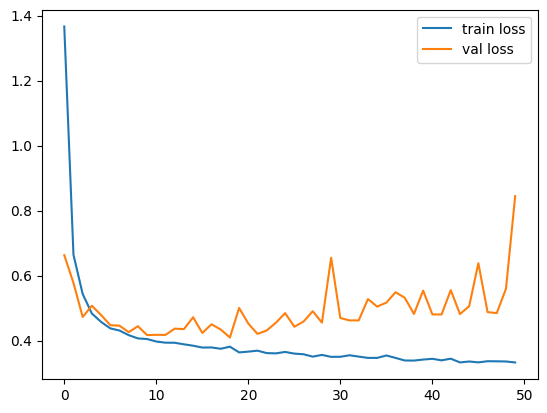

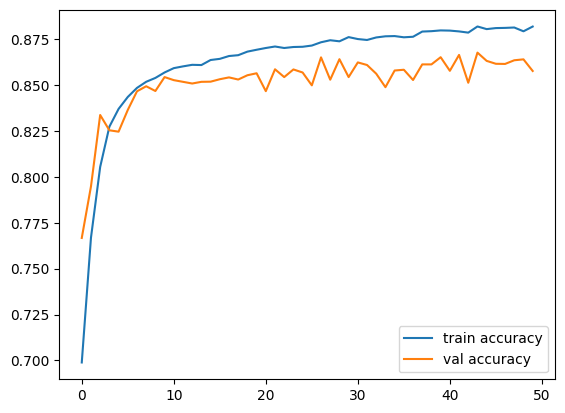

In [ ]:

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


Evaluation Metrics

In [ ]:
def model_eval(actual, predicted):
    print('Accuracy Score:', accuracy_score(actual, predicted))
    print('Confusion Matrix:\n', confusion_matrix(actual, predicted))
    print('Classification Report:\n', classification_report(actual, predicted))

Y_Hat or Predicted Values

In [ ]:
y_hat_train = np.argmax(model.predict(x_train), axis = 1)
y_hat_test = np.argmax(model.predict(x_test), axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
model_eval(y_train, y_hat_train)

Accuracy Score: 0.8855833333333333
Confusion Matrix:
 [[4199    3   42  138    6    0  351    0   29    0]
 [   8 4706    4   86    5    0   16    1    0    0]
 [  29    0 3862   52  368    0  482    0    7    0]
 [ 143    9   16 4312  164    0  111    0    3    0]
 [   5    4  520  151 3478    0  653    0    4    0]
 [   0    0    0    0    0 4830    2   21    1    5]
 [ 861    1  351  116  190    0 3215    0   23    0]
 [   0    0    0    0    0   22    1 4462    0  291]
 [   2    1   20   21    8    6   72    6 4713    2]
 [   1    0    0    0    0    5    0   53    0 4731]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      4768
           1       1.00      0.98      0.99      4826
           2       0.80      0.80      0.80      4800
           3       0.88      0.91      0.90      4758
           4       0.82      0.72      0.77      4815
           5       0.99      0.99      0.99      4859
           6